In [80]:
import pandas as pd
import sqlite3
import plotly.express as px
from datetime import date, datetime
from  plotly import graph_objects as go

In [3]:
con = sqlite3.connect('contrcalc.db')
contracts_df = pd.read_sql('Select * FROM contracts', con, index_col='contract_id',  parse_dates=['date_closure', 'date_fullfillment'])

In [4]:
contracts_df

,commodity_id,price_per_to,amount_to,date_closure,date_fullfillment
contract_id,,,,,
1,2,250.0,1000.0,2022-05-18,2022-11-30
2,2,330.0,300.0,2022-05-01,2022-11-16
3,2,300.0,300.0,2022-05-11,2022-11-16


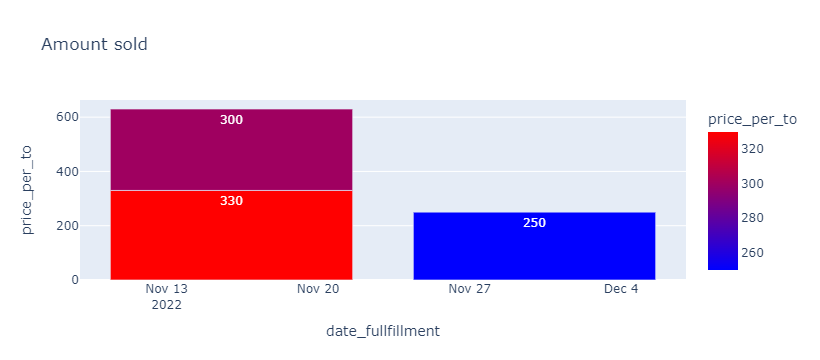

In [7]:
fig = px.bar(contracts_df, x="date_fullfillment",
             y="price_per_to", color="price_per_to",
             title="Amount sold",
             color_continuous_scale='Bluered',
            hover_name="date_closure",
            text_auto=True)
fig.show()

In [24]:
harvest_tph = 8.0
harvest_area = 250.0
harvest = {'harvest_tph':harvest_tph, 'harvest_area':harvest_area}


In [42]:
harvest_list=(harvest_tph, harvest_area,)

In [46]:
querry=("""
UPDATE commodities
SET 
    estimate_harvest_to = ?,
    area_planted = ?
WHERE
    commodity_id = 2;
""") 

In [48]:
try:
    con = sqlite3.connect('contrcalc.db')
    print("Connected to SQLite")
    cur = con.cursor()
    cur.execute(querry, harvest_list)
    con.commit()
    print("Total", cur.rowcount, "Records inserted successfully into SqliteDb_developers table")
    con.commit()
    cur.close()
except sqlite3.Error as error:
        print("Failed to insert multiple records into sqlite table", error)
finally:
    if (con):
        con.close()
        print("The SQLite connection is closed")

Connected to SQLite
Total 1 Records inserted successfully into SqliteDb_developers table
The SQLite connection is closed


In [49]:
con = sqlite3.connect('contrcalc.db')
commodities_df = pd.read_sql("Select * from commodities", con, index_col='commodity_id')
commodities_df

,name,harvest_month,sowing_month,reference_harvest_to,estimate_harvest_to,area_planted
commodity_id,,,,,,
1,barley,6,8,7.88,NaN,NaN
2,wheat,8,9,6.40,8.0,250.0
3,corn,9,4,8.20,NaN,NaN
4,rapeseed,7,8,3.69,NaN,NaN


In [52]:
commodities_df['total_harvest']= commodities_df['estimate_harvest_to']*commodities_df['area_planted']
commodities_df

,name,harvest_month,sowing_month,reference_harvest_to,estimate_harvest_to,area_planted,total_harvest
commodity_id,,,,,,,
1,barley,6,8,7.88,NaN,NaN,NaN
2,wheat,8,9,6.40,8.0,250.0,2000.0
3,corn,9,4,8.20,NaN,NaN,NaN
4,rapeseed,7,8,3.69,NaN,NaN,NaN


In [54]:
 
commodities_df['next_harvest_date'] =  [datetime.strptime(f'2022/{month}/01', "%Y/%m/%d") for month in commodities_df['harvest_month']]

In [55]:
commodities_df['estimate_harvest_to']= [8,6.3, 8, 3.5]
commodities_df['area_planted']	 = [80, 120, 50, 60]
commodities_df['total_harvest']=commodities_df['estimate_harvest_to']*commodities_df['area_planted']	

In [56]:
commodities_df

,name,harvest_month,sowing_month,reference_harvest_to,estimate_harvest_to,area_planted,total_harvest,next_harvest_date
commodity_id,,,,,,,,
1,barley,6,8,7.88,8.0,80,640.0,2022-06-01
2,wheat,8,9,6.40,6.3,120,756.0,2022-08-01
3,corn,9,4,8.20,8.0,50,400.0,2022-09-01
4,rapeseed,7,8,3.69,3.5,60,210.0,2022-07-01


In [87]:
type(commodities_df['harvest_month'][2])

numpy.int64

In [69]:
contracts_df["date_fullfillment"][1].month

11

In [100]:
commodities_df

,name,harvest_month,sowing_month,reference_harvest_to,estimate_harvest_to,area_planted,total_harvest,next_harvest_date
commodity_id,,,,,,,,
1,barley,6,8,7.88,8.0,80,640.0,2022-06-01
2,wheat,8,9,6.40,6.3,120,756.0,2022-08-01
3,corn,9,4,8.20,8.0,50,400.0,2022-09-01
4,rapeseed,7,8,3.69,3.5,60,210.0,2022-07-01


In [101]:
commodities_df[commodities_df.index==2]

,name,harvest_month,sowing_month,reference_harvest_to,estimate_harvest_to,area_planted,total_harvest,next_harvest_date
commodity_id,,,,,,,,
2,wheat,8,9,6.4,6.3,120,756.0,2022-08-01


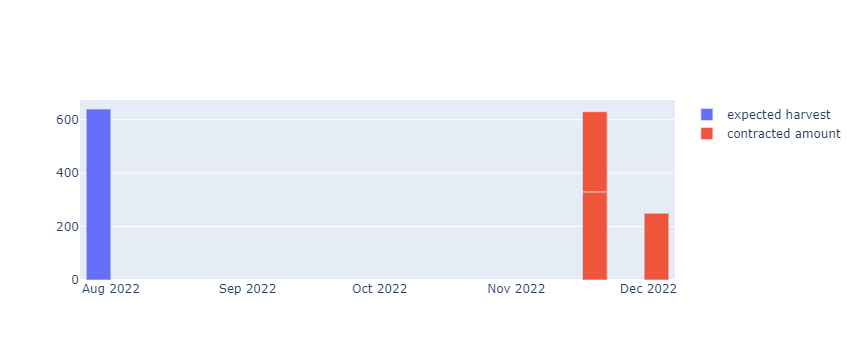

In [102]:
fig = go.Figure()

fig.add_trace(go.Bar(x=commodities_df[commodities_df.index==2]['next_harvest_date'],
             y=commodities_df['total_harvest'], name='expected harvest'))
fig.add_trace(go.Bar( name='contracted amount', x=contracts_df["date_fullfillment"],
             y=contracts_df["price_per_to"]))
fig.show()